## **PREDICTING_COVID-19_IN_HUNGARY_USING_MACHINE_LEARNING**

##### IMPORTING LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### LOADING THE DATASET

In [2]:
covid_dataset = pd.read_csv(r'E:\Data_Science\PROJECTS\PREDICTING_COVID-19_USING_MACHINE_LEARNING\covid.csv')

##### EXPLORING THE DATASET

In [3]:
covid_dataset.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
5,ABW,Aruba,2020-03-27,28,9,0,0,262.256,84.296,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
6,ABW,Aruba,2020-03-28,28,0,0,0,262.256,0.000,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
7,ABW,Aruba,2020-03-29,28,0,0,0,262.256,0.000,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
8,ABW,Aruba,2020-03-30,50,22,0,0,468.314,206.058,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
9,ABW,Aruba,2020-04-01,55,5,0,0,515.145,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [4]:
covid_dataset.tail(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
19486,NaN,International,2020-02-23,634,0,2,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19487,NaN,International,2020-02-24,691,57,3,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19488,NaN,International,2020-02-25,691,0,3,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19489,NaN,International,2020-02-26,691,0,4,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19490,NaN,International,2020-02-27,705,14,4,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19491,NaN,International,2020-02-28,705,0,4,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19492,NaN,International,2020-02-29,705,0,6,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19493,NaN,International,2020-03-01,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19494,NaN,International,2020-03-02,705,0,6,0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19495,NaN,International,2020-03-10,696,-9,7,1,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
covid_dataset.shape

(19496, 32)

In [6]:
covid_dataset.columns

Index(['iso_code', 'location', 'date', 'total_cases', 'new_cases',
       'total_deaths', 'new_deaths', 'total_cases_per_million',
       'new_cases_per_million', 'total_deaths_per_million',
       'new_deaths_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand', 'tests_units',
       'stringency_index', 'population', 'population_density', 'median_age',
       'aged_65_older', 'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cvd_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_100k'],
      dtype='object')

In [7]:
covid_dataset.dtypes

iso_code                            object
location                            object
date                                object
total_cases                          int64
new_cases                            int64
total_deaths                         int64
new_deaths                           int64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
tests_units                         object
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_older                      float64
aged_70_old

In [9]:
covid_dataset.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
count,1.949600e+04,19496.000000,19496.000000,19496.000000,19119.000000,19119.000000,19119.000000,19119.000000,5.164000e+03,4592.000000,...,17516.000000,17664.000000,17514.000000,11618.000000,17679.000000,18322.000000,14444.000000,14290.000000,7674.000000,16336.000000
mean,1.752634e+04,540.990152,1162.475739,35.055601,499.008529,13.312513,21.855009,0.585176,2.466140e+05,10273.971690,...,9.922658,6.322441,23347.911758,10.004596,244.735053,8.006378,11.353923,32.639889,55.563306,3.238098
std,1.808525e+05,4858.071697,12377.578661,334.755956,1458.509832,63.749619,92.098024,3.604289,8.946899e+05,34126.717986,...,6.478670,4.452068,21417.397147,17.425455,119.087724,4.019256,10.575776,13.190948,30.870108,2.616300
min,0.000000e+00,-2461.000000,0.000000,0.000000,0.000000,-265.189000,0.000000,0.000000,1.000000e+00,1.000000,...,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000
25%,5.000000e+00,0.000000,0.000000,0.000000,0.593000,0.000000,0.000000,0.000000,8.090250e+03,538.500000,...,4.031000,2.380000,6885.829000,0.500000,145.183000,5.310000,1.900000,21.400000,24.640000,1.400000
50%,8.400000e+01,2.000000,1.000000,0.000000,26.720000,0.246000,0.167000,0.000000,4.302400e+04,1946.000000,...,7.846500,5.021000,15847.419000,1.500000,233.070000,7.110000,7.100000,31.400000,59.607000,2.600000
75%,1.135250e+03,43.000000,24.000000,1.000000,252.172000,5.857500,4.538500,0.054000,1.535690e+05,6233.250000,...,15.413000,9.842000,35938.374000,10.000000,311.110000,10.080000,20.000000,40.800000,84.169000,4.280000
max,5.273572e+06,107909.000000,341722.000000,10520.000000,19594.555000,4944.376000,1237.551000,200.040000,1.378479e+07,416546.000000,...,27.049000,18.493000,116935.600000,77.600000,724.417000,23.360000,44.000000,78.100000,98.999000,13.800000


In [10]:
covid_dataset['location'].value_counts()

location
Sweden            146
Canada            146
United States     146
Lithuania         146
Brazil            146
                 ... 
Yemen              45
Western Sahara     29
Tajikistan         24
Comoros            23
Lesotho            10
Name: count, Length: 212, dtype: int64

##### DATA WARNGLING

In [11]:
# how many duplicated rows we have
covid_dataset.duplicated().sum()

0

In [14]:
# checking for missing values
covid_dataset.isna().any()

iso_code                            True
location                           False
date                               False
total_cases                        False
new_cases                          False
total_deaths                       False
new_deaths                         False
total_cases_per_million             True
new_cases_per_million               True
total_deaths_per_million            True
new_deaths_per_million              True
total_tests                         True
new_tests                           True
total_tests_per_thousand            True
new_tests_per_thousand              True
new_tests_smoothed                  True
new_tests_smoothed_per_thousand     True
tests_units                         True
stringency_index                    True
population                          True
population_density                  True
median_age                          True
aged_65_older                       True
aged_70_older                       True
gdp_per_capita  

In [15]:
# sum of null values
covid_dataset.isna().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

##### We are interested in the cases in Hungary, so I create a dataframe from the cases occured in Hungary

In [16]:
covid_Hungary=covid_dataset[covid_dataset["location"]=="Hungary"]

In [17]:
covid_Hungary.head(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8093,HUN,Hungary,2020-03-04,0,0,0,0,NaN,NaN,NaN,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8094,HUN,Hungary,2020-03-05,2,2,0,0,0.207,0.207,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8095,HUN,Hungary,2020-03-06,0,0,0,0,NaN,NaN,NaN,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8096,HUN,Hungary,2020-03-07,4,2,0,0,0.414,0.207,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8097,HUN,Hungary,2020-03-08,7,3,0,0,0.725,0.311,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8098,HUN,Hungary,2020-03-09,8,1,0,0,0.828,0.104,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8099,HUN,Hungary,2020-03-10,9,1,0,0,0.932,0.104,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8100,HUN,Hungary,2020-03-11,12,3,0,0,1.242,0.311,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8101,HUN,Hungary,2020-03-12,13,1,0,0,1.346,0.104,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8102,HUN,Hungary,2020-03-13,16,3,0,0,1.656,0.311,0.0,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02


In [18]:
covid_Hungary.tail(10)

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
8165,HUN,Hungary,2020-05-15,3417,37,442,6,353.714,3.830,45.754,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8166,HUN,Hungary,2020-05-16,3473,56,448,6,359.511,5.797,46.375,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8167,HUN,Hungary,2020-05-17,3509,36,451,3,363.237,3.727,46.686,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8168,HUN,Hungary,2020-05-18,3535,26,462,11,365.929,2.691,47.824,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8169,HUN,Hungary,2020-05-19,3556,21,467,5,368.103,2.174,48.342,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8170,HUN,Hungary,2020-05-20,3598,42,470,3,372.450,4.348,48.652,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8171,HUN,Hungary,2020-05-21,3641,43,473,3,376.901,4.451,48.963,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8172,HUN,Hungary,2020-05-22,3678,37,476,3,380.732,3.830,49.274,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8173,HUN,Hungary,2020-05-23,3713,35,482,6,384.355,3.623,49.895,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02
8174,HUN,Hungary,2020-05-24,3741,28,486,4,387.253,2.898,50.309,...,18.577,11.976,26777.561,0.5,278.296,7.55,26.8,34.8,NaN,7.02


In [19]:
covid_Hungary.shape

(82, 32)

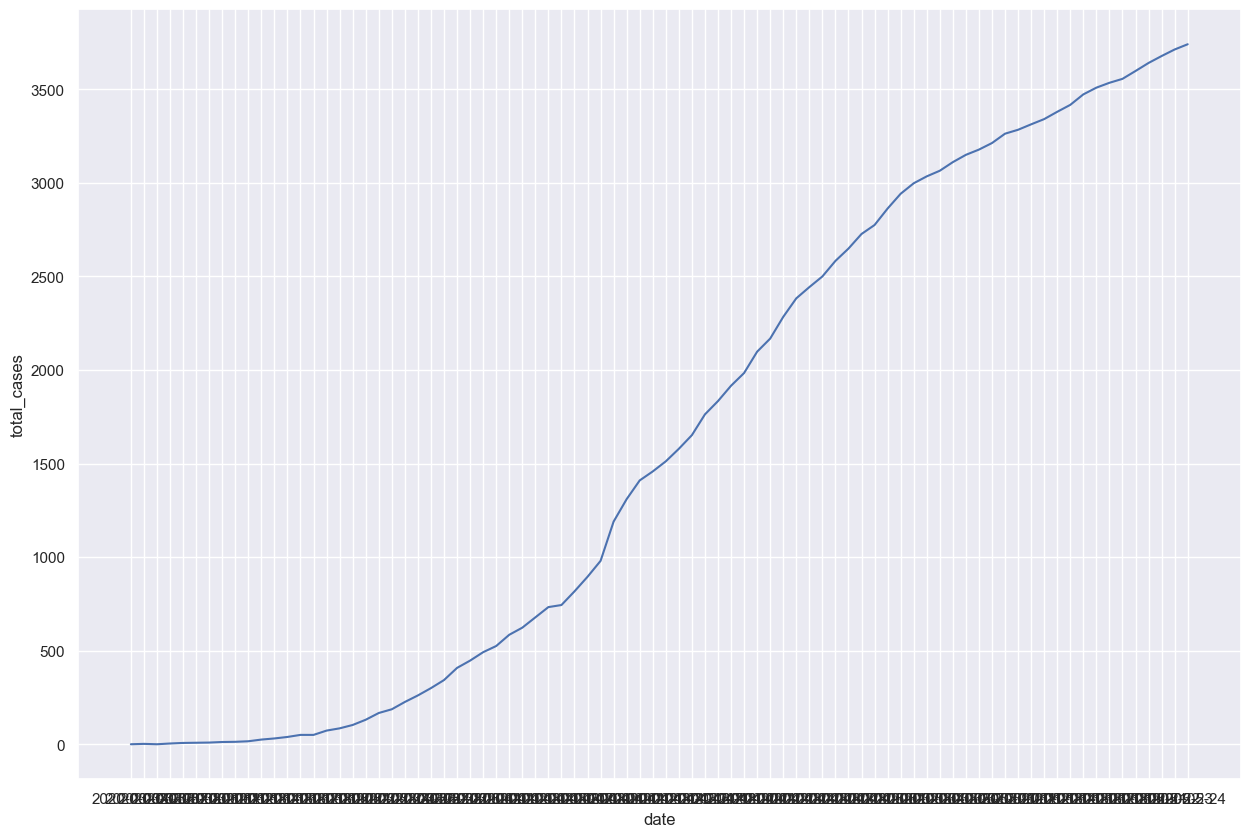

In [36]:
# Total cases per day
sns.lineplot(x="date",y="total_cases",data=covid_Hungary)
plt.show()

In [25]:
# Total cases in the first 10 days
first_10 = covid_Hungary.head(10)

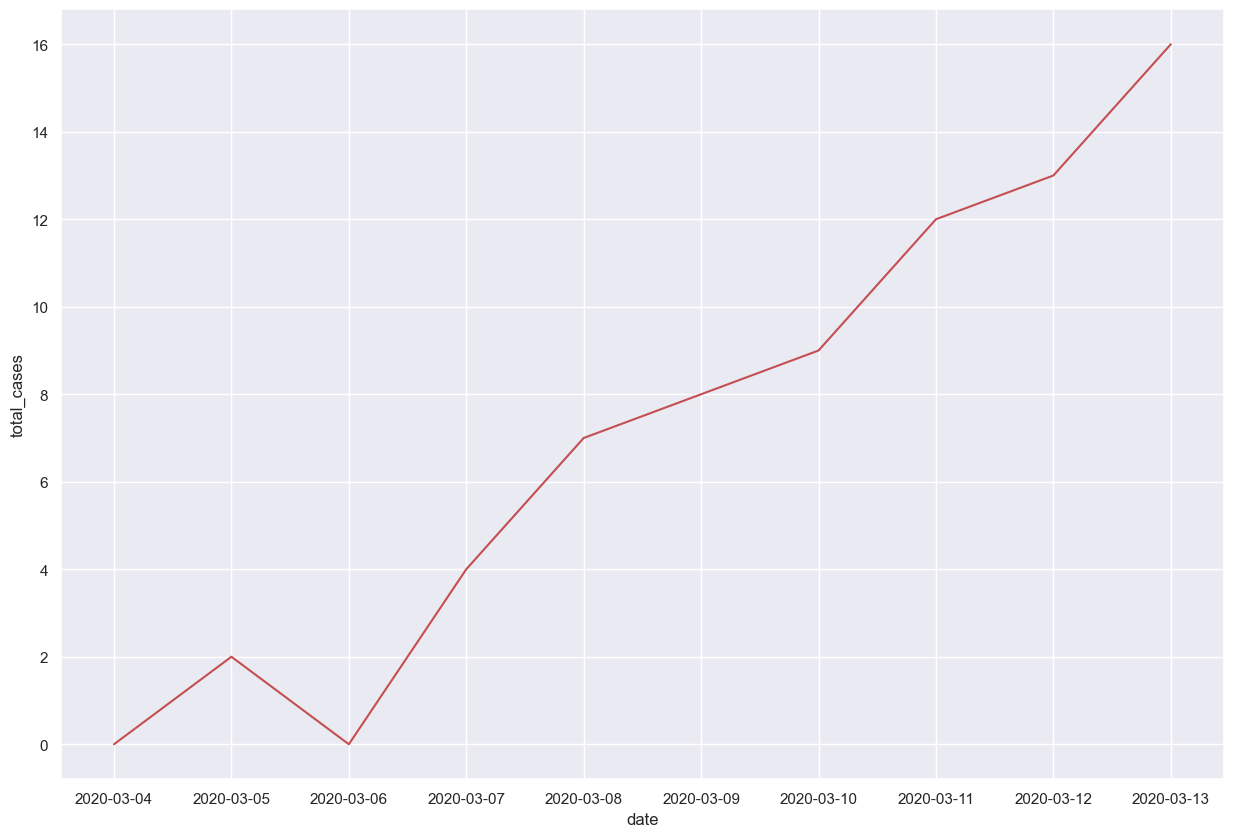

In [27]:
sns.lineplot(x='date', y = 'total_cases', data = first_10, color = 'r')
plt.show()

In [33]:
# Total cases in the last 10 days
last_10 = covid_Hungary.tail(10)

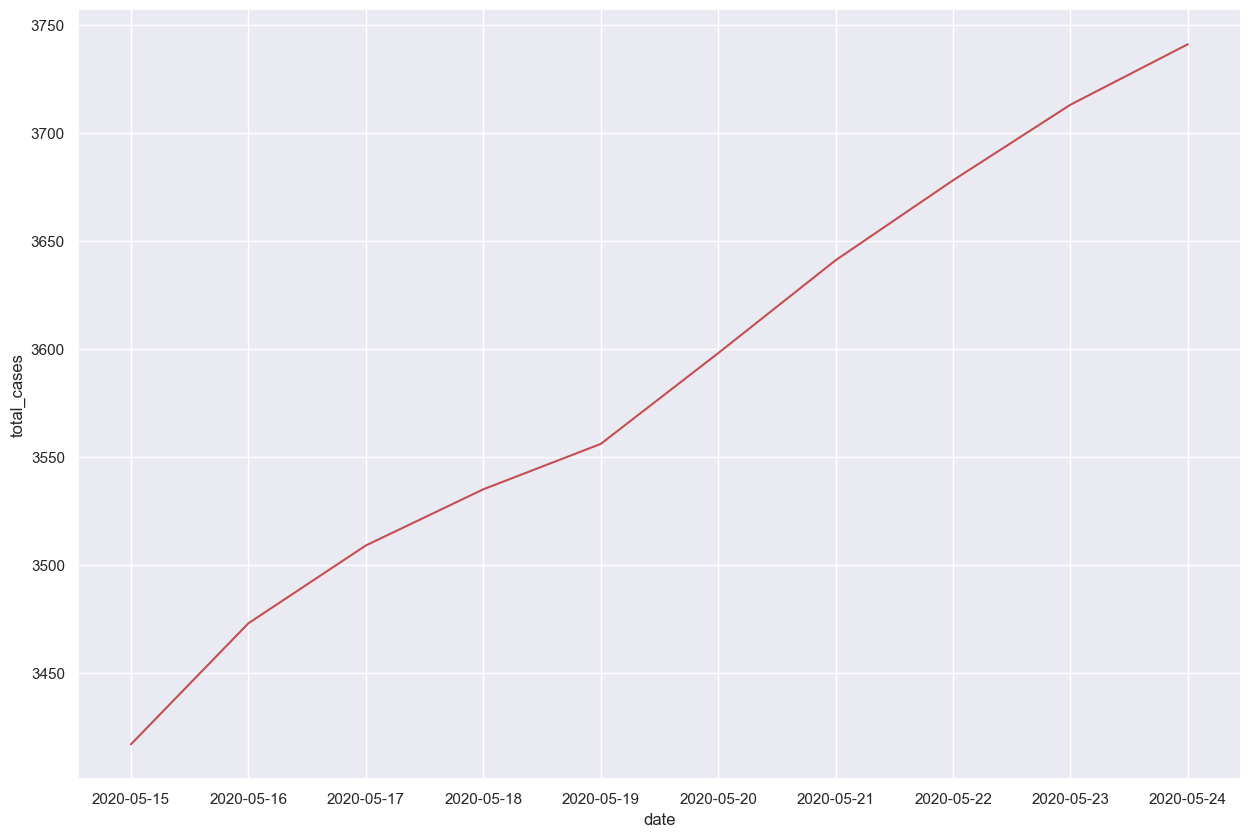

In [34]:
sns.lineplot(x = 'date', y = 'total_cases', data = last_10, color = 'r')
plt.show()

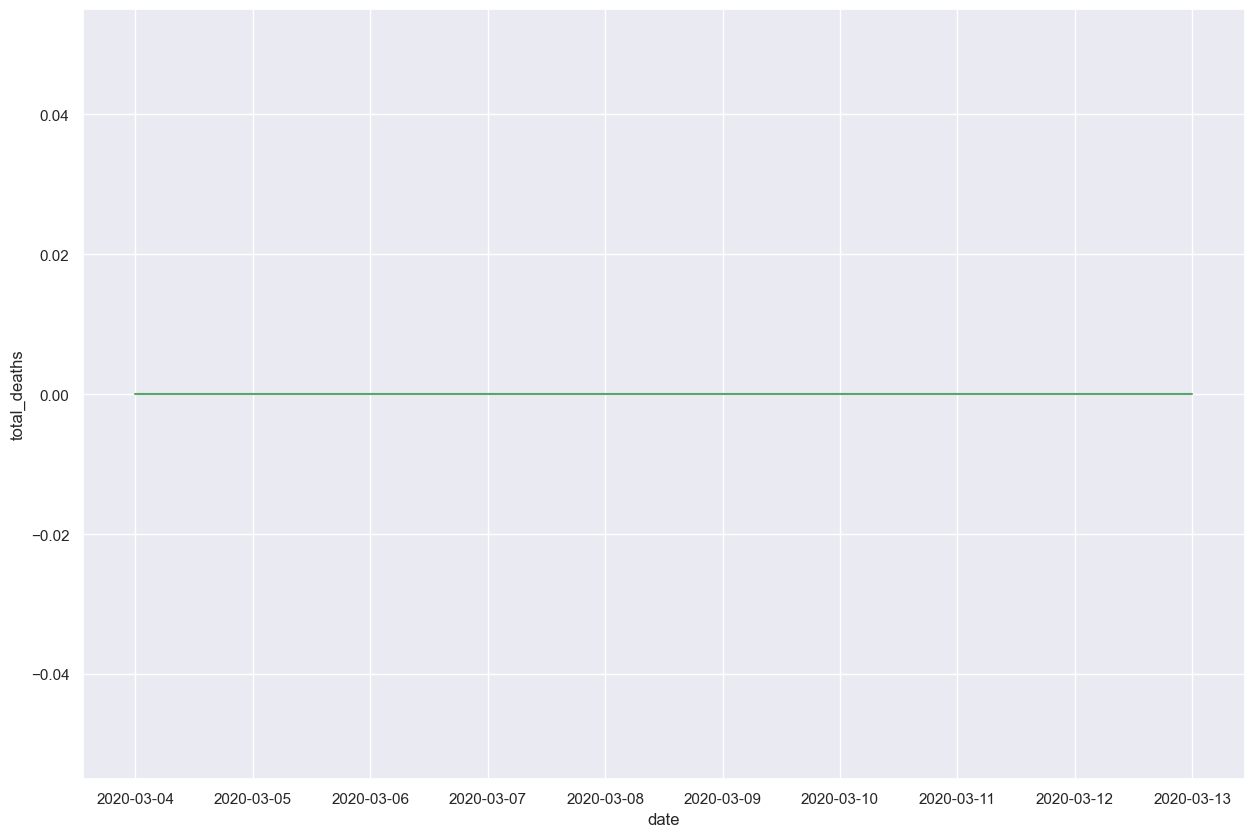

In [31]:
# Total death cases in the first 10 days
sns.lineplot(x = 'date', y = 'total_deaths', data = first_10, color = 'g')
plt.show()

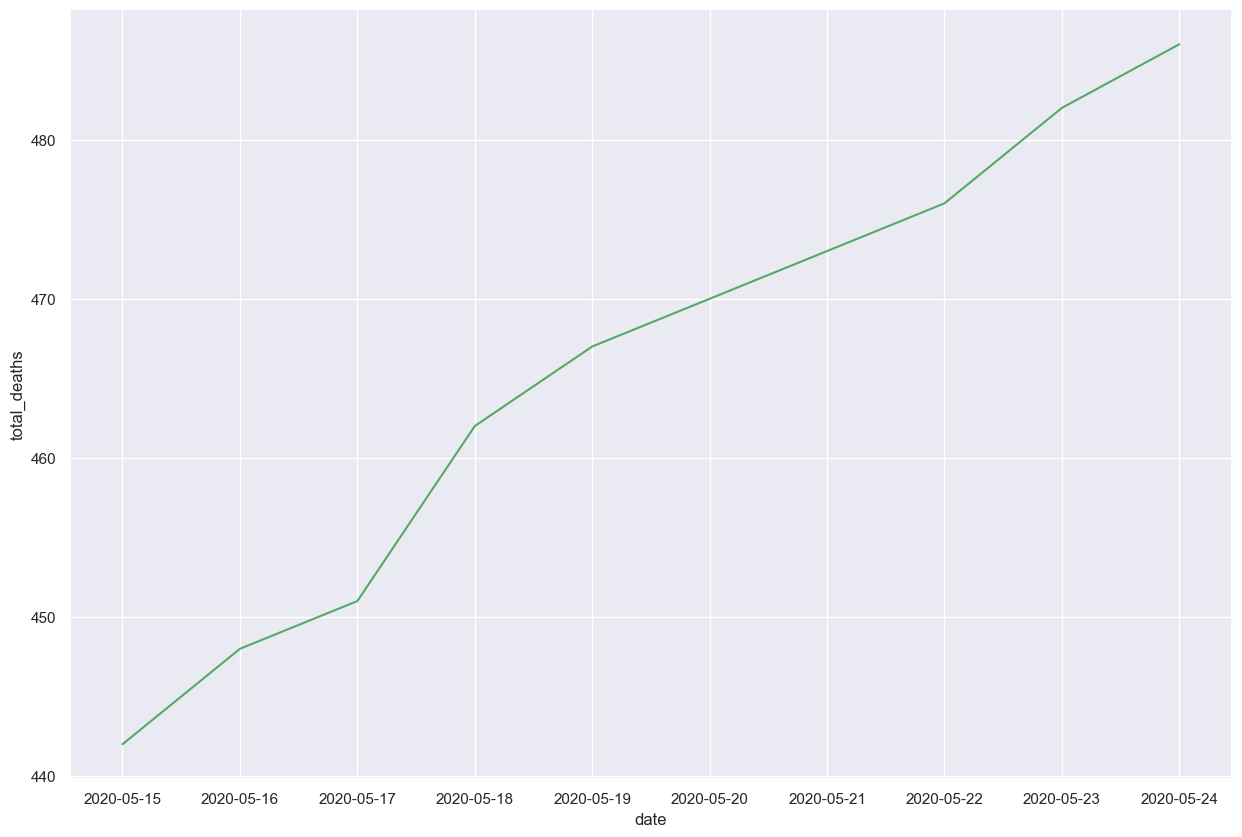

In [32]:
# Total death cases in the last 10 days
sns.lineplot(x = 'date', y = 'total_deaths', data = last_10, color = 'g')
plt.show()

In [40]:
# Top 5 countries with the most cases on the last day 
last_date_data = covid_dataset[covid_dataset["date"]=="2020-05-24"]
max_cases=last_date_data.sort_values(by="total_cases",ascending=False)
max_cases[1:6]

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
18391,USA,United States,2020-05-24,1622670,21236,97087,1080,4902.287,64.157,293.312,...,15.413,9.732,54225.446,1.2,151.089,10.79,19.1,24.6,NaN,2.77
2655,BRA,Brazil,2020-05-24,347398,16508,22013,965,1634.357,77.663,103.562,...,8.552,5.060,14103.452,3.4,177.961,8.11,10.1,17.9,NaN,2.20
15569,RUS,Russia,2020-05-24,335882,9434,3388,139,2301.595,64.645,23.216,...,14.178,9.393,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05
9396,ITA,Italy,2020-05-24,229327,669,32735,119,3792.922,11.065,541.416,...,23.021,16.240,35220.084,2.0,113.151,4.78,19.8,27.8,NaN,3.18
4613,DEU,Germany,2020-05-24,178281,431,8247,31,2127.866,5.144,98.432,...,21.453,15.957,45229.245,NaN,156.139,8.31,28.2,33.1,NaN,8.00


In [47]:
# European countries with the most cases and Hungary
Hungary_Italy_Germany=covid_dataset[(covid_dataset["location"] =="Italy") | (covid_dataset["location"]=="Germany") | (covid_dataset["location"]=="Hungary")]

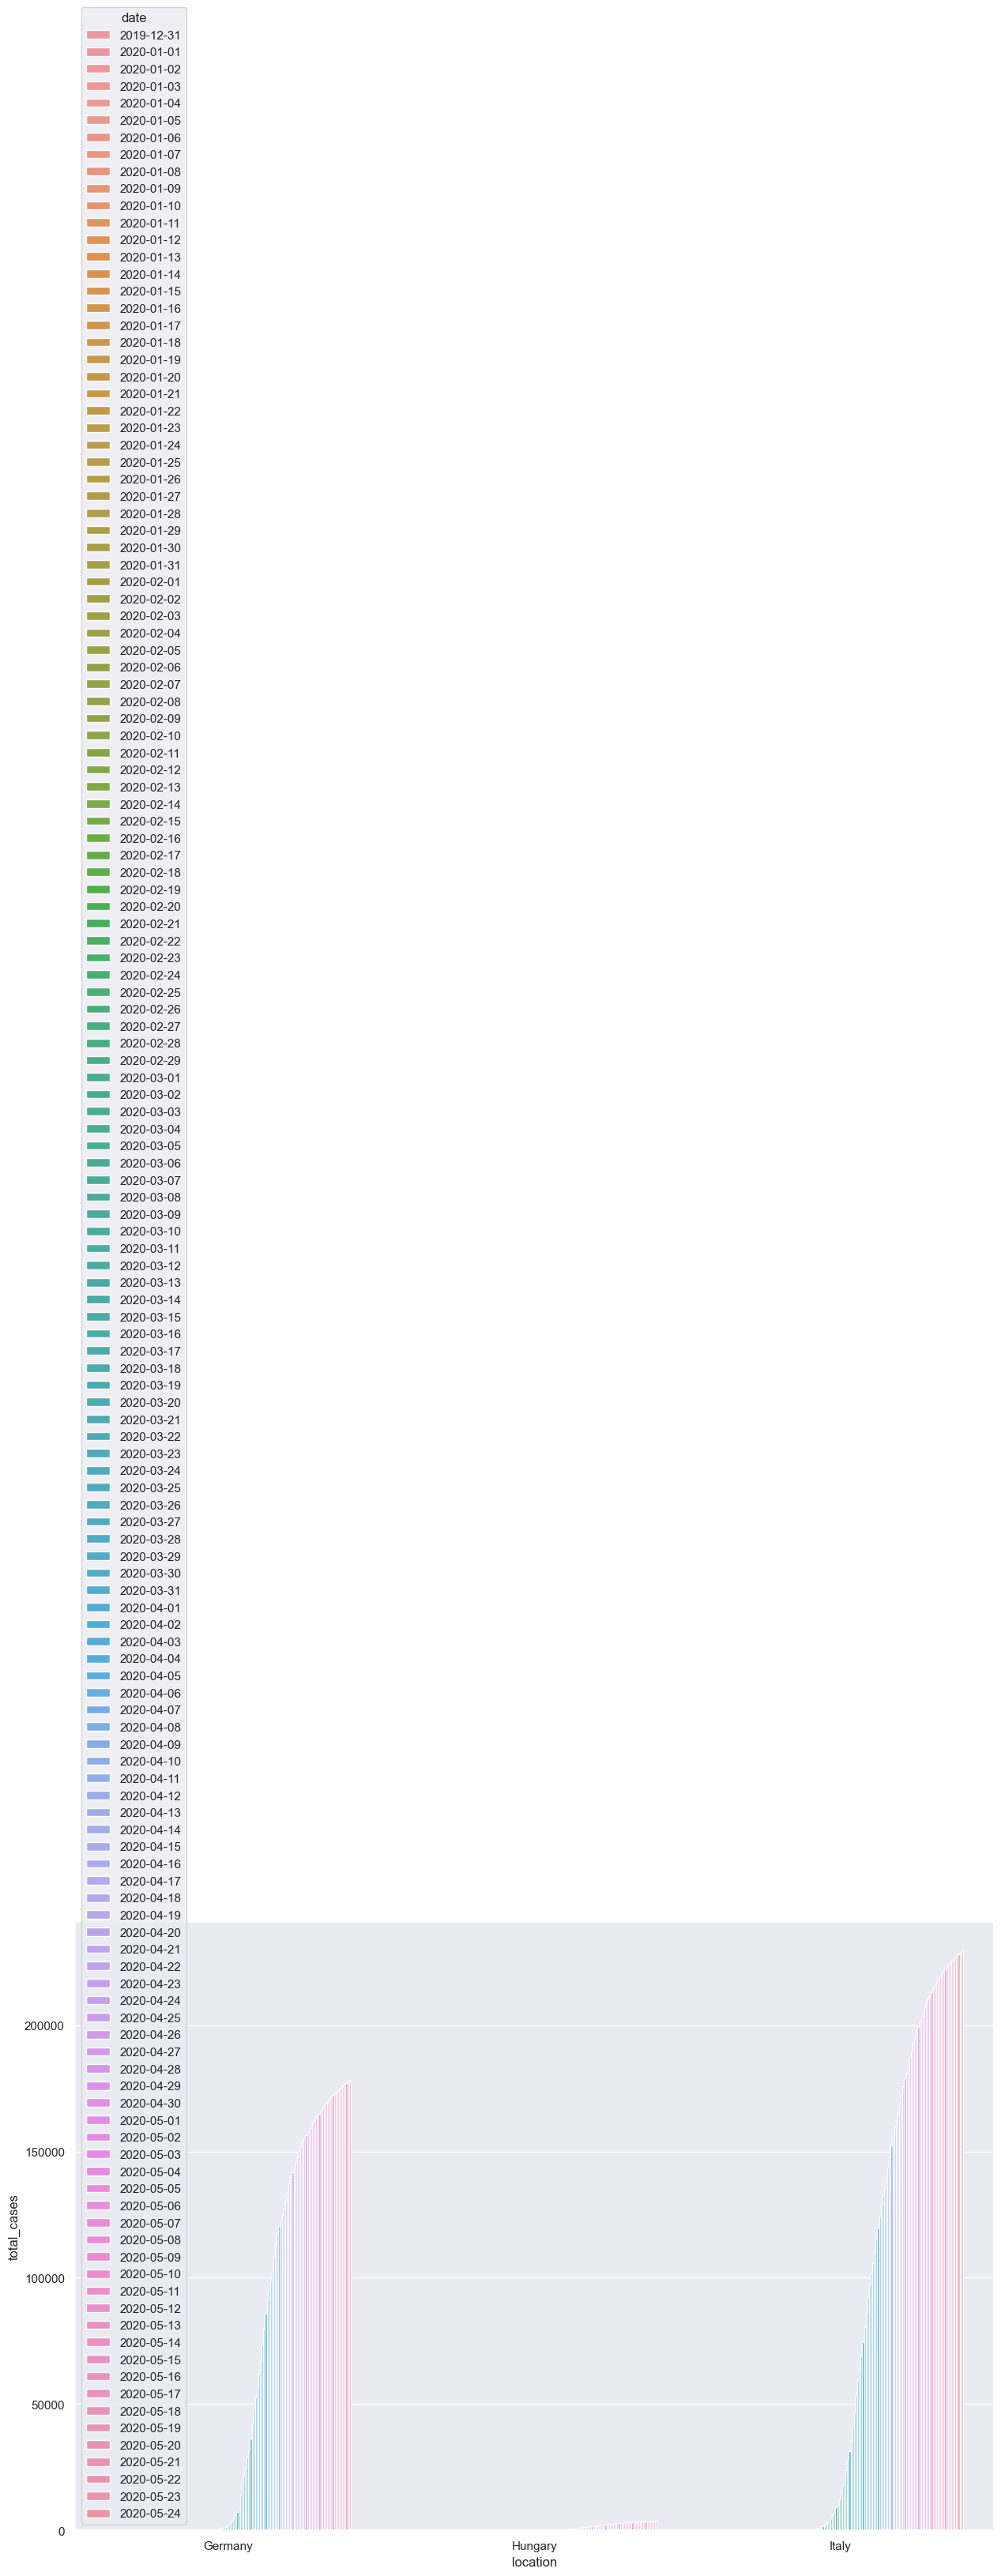

In [49]:
#  Visualizing the growth of cases across Hungary, Italy and Germany
sns.set(rc={'figure.figsize':(15,10)})
sns.barplot(x="location",y="total_cases",data=Hungary_Italy_Germany,hue="date")
plt.show()

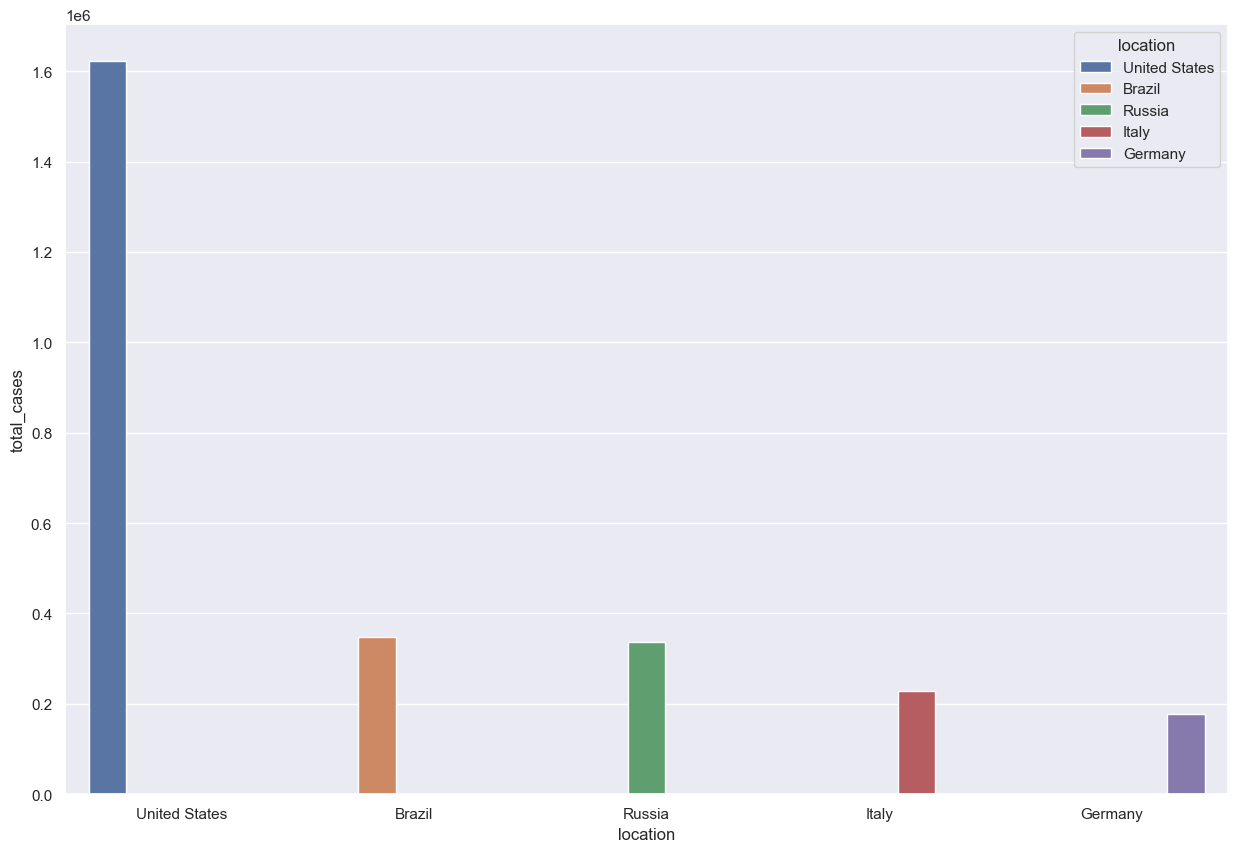

In [50]:
# Creating a bar plot for countries with top cases
sns.barplot(x="location",y="total_cases",data=max_cases[1:6],hue="location")
plt.show()

##### LINEAR REGRESSION

In [53]:
lr = LinearRegression()

In [59]:
# defining the variables 
x = covid_Hungary['date']
y = covid_Hungary['total_cases']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [61]:
lr.fit(np.array(x_train).reshape(-1,1),np.array(y_train).reshape(-1,1))

LinearRegression()

In [62]:
y_pred=lr.predict(np.array(x_test).reshape(-1,1))

In [63]:
mean_squared_error(x_test,y_pred)

541621189255.3554

In [64]:
lr.predict(np.array([[737573]]))

array([[4101.92947733]])